Importing the Dependencies

In [2]:
import numpy as np  # used for arrays
import pandas as pd # used for data processing (data loading, data manipulation, etc)
import matplotlib.pyplot as plt # used for plotting graphs
import seaborn as sns
from sklearn.model_selection import train_test_split # used for training and testing the data (automatically)
from xgboost import XGBRegressor # loading the XGBRegressor
from sklearn import metrics # r2 and mean absolute error 

Data Collection & Processing

In [3]:
# loading the data from csv file to a Pandas DataFrame

calories = pd.read_csv('calories.csv')

In [4]:
# printing the first 5 rows of the dataframe

calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_data = pd.read_csv('exercise.csv')

# reading the excercise csv into a pandas dataframe

In [6]:
exercise_data.head()

# printing the first 5 rows of the excercise dataset

# These 2 datasets are connected using the primary key - User_ID

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [7]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

# adding an extra 'Calories' column to the exercise_data dataframe, axis = 1 indicates column concatenation. 

In [8]:
calories_data.head()

# last column is calories

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
# number of rows and columns

calories_data.shape

(15000, 9)

In [10]:
#informations about the data

calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
# checking for missing values

calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [12]:
# statistical measures about the data

calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [13]:
sns.set()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

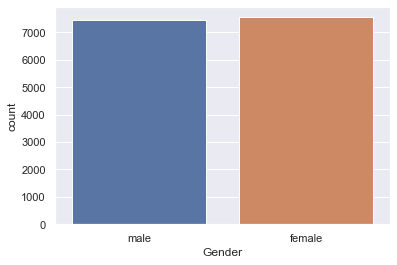

In [19]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])
# Almost equal, female count exceeds male by a little bit


<AxesSubplot:xlabel='Age', ylabel='Count'>

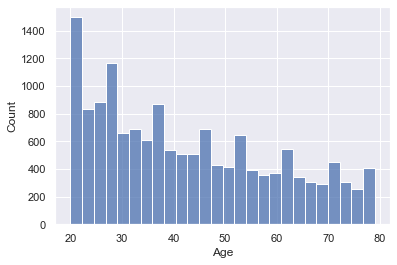

In [23]:
# finding the distribution of "Age" column
sns.histplot(calories_data['Age'])

# graph has right skewness, right tail heavier than left.

<AxesSubplot:xlabel='Height', ylabel='Count'>

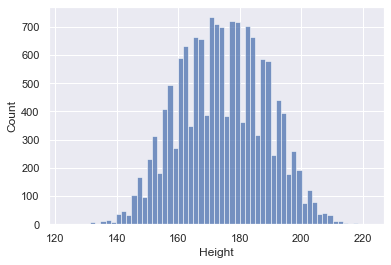

In [24]:
# finding the distribution of "Height" column
sns.histplot(calories_data['Height'])

# normal distribution

<AxesSubplot:xlabel='Weight', ylabel='Count'>

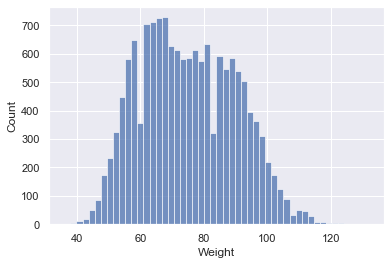

In [25]:
# finding the distribution of "Weight" column
sns.histplot(calories_data['Weight'])

Finding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [26]:
correlation = calories_data.corr()

<AxesSubplot:>

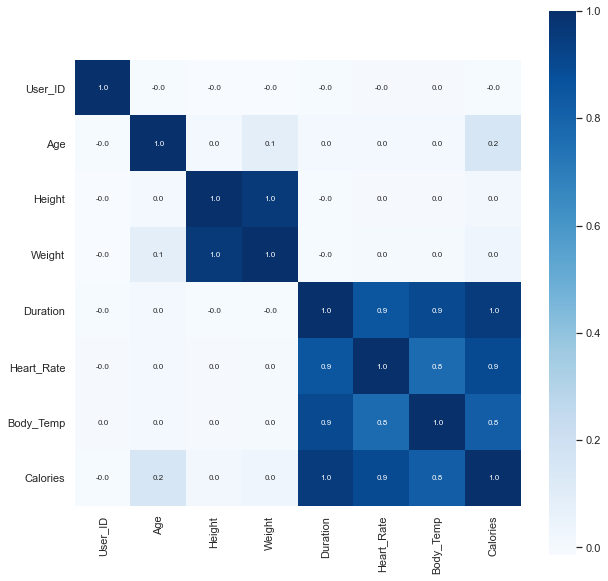

In [27]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Duration, heart_rate, body_temp, calories have the max correlation amoung them

Converting the text data to numerical values

In [28]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

# changing the values of gender as Male -> 0, Female -> 1 for simplicity.

In [29]:
calories_data.head()

# all values are numerical

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [30]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [31]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [32]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [35]:
# loading the model
model = XGBRegressor()

In [36]:
# training the model with X_train
model.fit(X_train, Y_train)

[18:26:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

Prediction on Test Data

In [49]:
test_data_prediction = model.predict(X_test)
train_data_prediction = model.predict(X_train)

In [38]:
print(Y_test)

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64


In [39]:
print(test_data_prediction)

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


Mean Absolute Error

In [40]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [43]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  2.7159012502233186


In [50]:
# R squared Error
error_score_tr = metrics.r2_score(Y_train, train_data_prediction)
print("R squared Error : ", error_score_tr)

R squared Error :  0.9966777021480265


In [51]:
# R squared Error for test data prediction
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9963065655529431


Text(0, 0.5, 'Predicted Price')

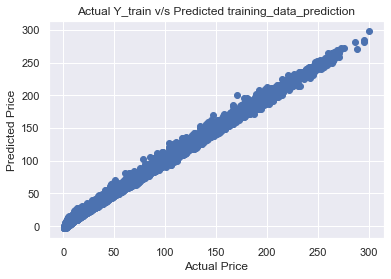

In [57]:
plt.scatter(Y_train, train_data_prediction)
plt.title('Actual Y_train v/s Predicted training_data_prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

Text(0, 0.5, 'Predicted Price')

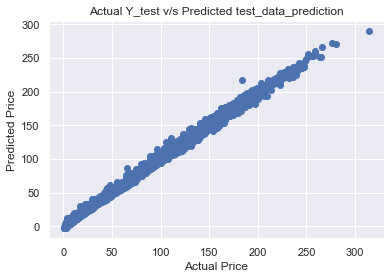

In [58]:
plt.scatter(Y_test, test_data_prediction)
plt.title('Actual Y_test v/s Predicted test_data_prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# A linear plot amoung Y_test and model 